# Week 5 Lab

In [1]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *

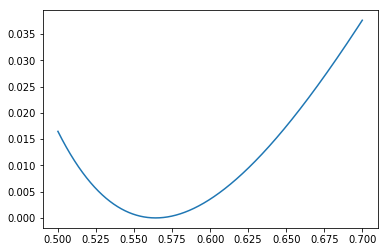

In [3]:
alphas = np.linspace(0.5, 0.7, 100000)

def dd(x, a):
    return np.exp(-(x / a) ** 2) / (abs(a) * np.sqrt(np.pi))

dd_result = (np.array( [dd(0, a) for a in alphas]) - 1)**2 
plt.plot(alphas, dd_result)
idx = np.argmin(dd_result)
alphas[idx]

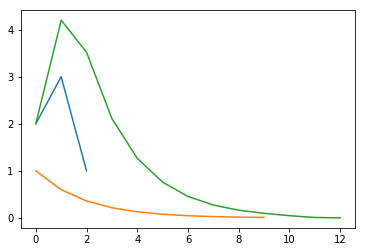

In [4]:
x = np.array([2, 3, 1])
h = 0.6 ** np.arange(10)

convolved_sums = convolver.convolve(x, h)

plt.plot(x)
plt.plot(h)
plt.plot(convolved_sums)
plt.show()

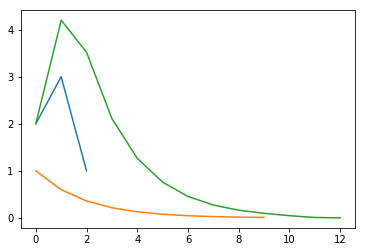

In [5]:
x = np.array([2, 3, 1])
h = 0.6 ** np.arange(10)

convolved_sums = convolver.convolve2(x, h)

plt.plot(x)
plt.plot(h)
plt.plot(convolved_sums)
plt.show()

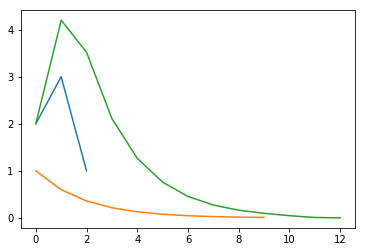

In [6]:
x = np.array([2, 3, 1])
h = 0.6 ** np.arange(10)

convolved_sums = convolver.convolve3(x, h)

plt.plot(x)
plt.plot(h)
plt.plot(convolved_sums)
plt.show()

In [7]:
x = np.ones(10)
h = np.array([0.5, 1, 0.5])
convolved_sums = convolver.convolve(x, h)
convolved_sums

array([0.5, 1.5, 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 1.5, 0.5, 0. ])

In [8]:
N = 300
window_size = 30

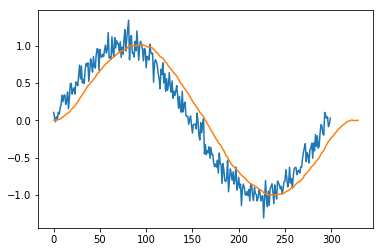

In [9]:
x = np.linspace(0, PI2, N)
y = np.sin(x) + np.random.randn(N) * 0.1
conv = convolver.moving_average(y, window_size=window_size)
plt.plot(y)
plt.plot(conv);

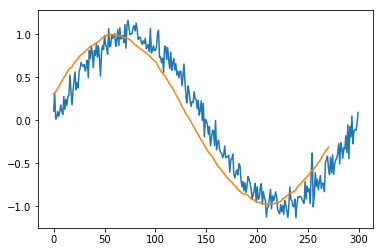

In [10]:
x = np.linspace(0, PI2, N)
y = np.sin(x) + np.random.randn(N) * 0.1
conv = convolver.moving_average2(y, window_size=window_size)
plt.plot(y)
plt.plot(conv);

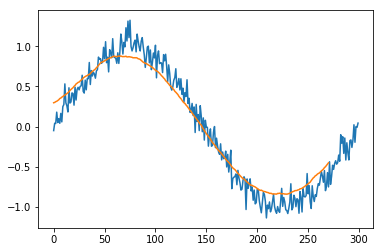

In [11]:
x = np.linspace(0, PI2, N)
y = np.sin(x) + np.random.randn(N) * 0.1
conv = convolver.leaky_integrator(y, window_size=window_size)
plt.plot(y)
plt.plot(conv);

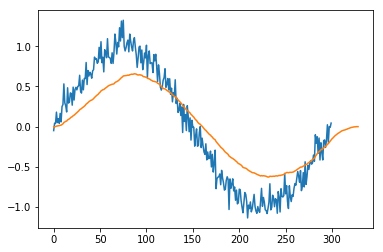

In [12]:
h = convolver.leaky_window(window_size=window_size)
conv = np.convolve(y, h)
conv = np.convolve(y, h)
plt.plot(y)
plt.plot(conv);

In [13]:
x = np.array([1, 2, 3, 4, 5, 2, 3, 5, 1, 2])
convolver.moving_average(x, 4)

array([0.25, 0.75, 1.5 , 2.5 , 3.5 , 3.5 , 3.5 , 3.75, 2.75, 2.75, 2.  ,
       0.75, 0.5 , 0.  ])

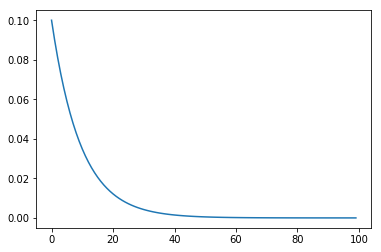

In [14]:
x = np.arange(100)
lamda = 0.9
y = (1-lamda)*lamda**x
plt.plot(y);

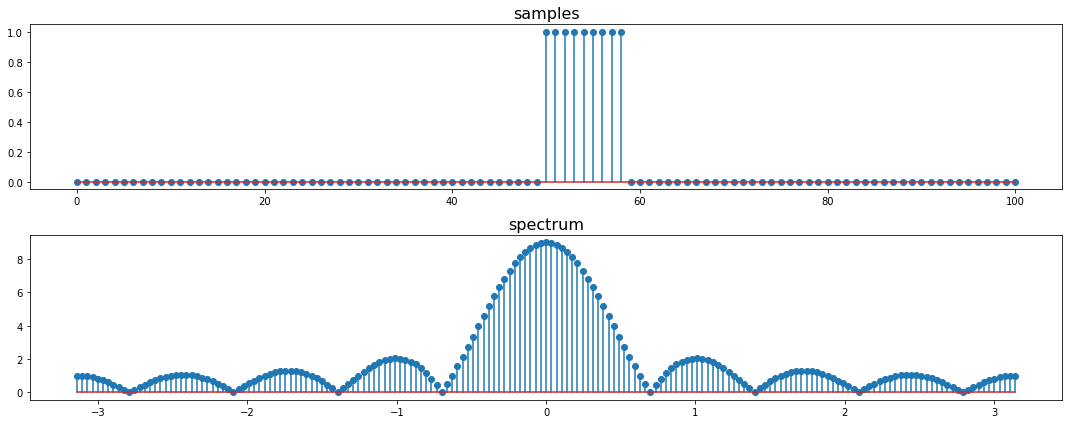

In [15]:
M = 9
x = np.zeros(101)
x[50:50+M] = 1
X = fourier.dtft(x)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


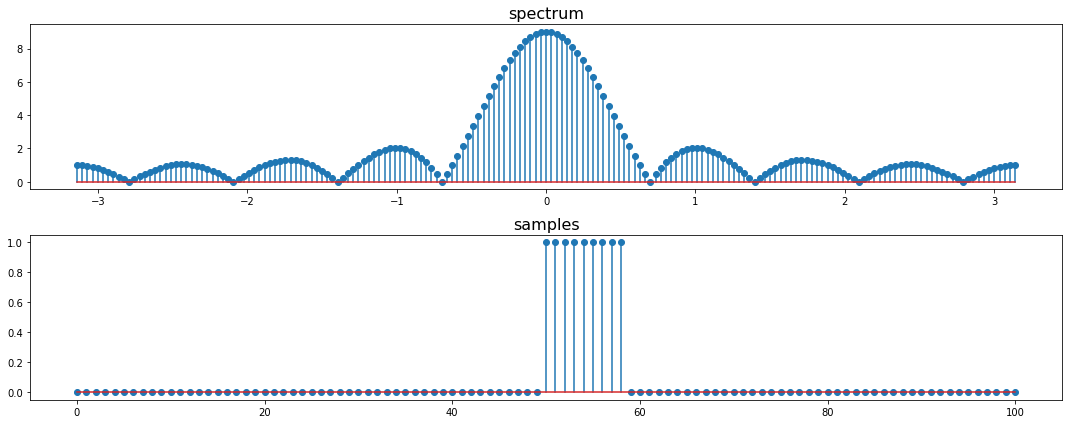

In [16]:
x = fourier.idtft(X, n_samples=len(x))

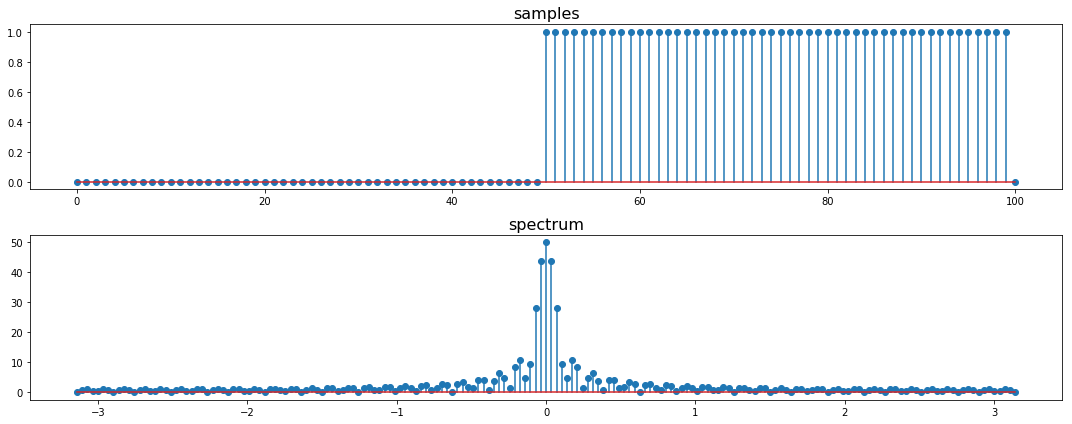

In [17]:
M = 50
x = np.zeros(101)
x[50:50+M] = 1
X = fourier.dtft(x)

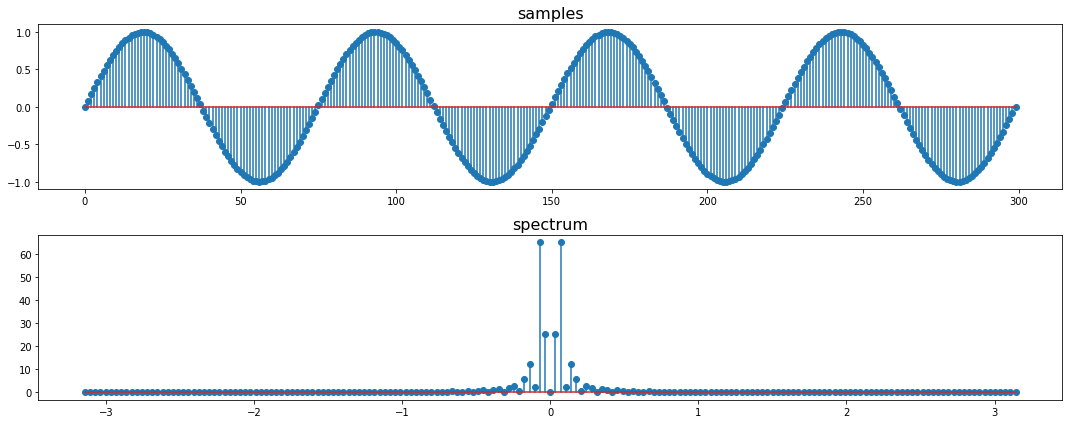

In [18]:
x = np.linspace(0, PI2*2*2, N)
y = np.sin(x)
Y = fourier.dtft(y)

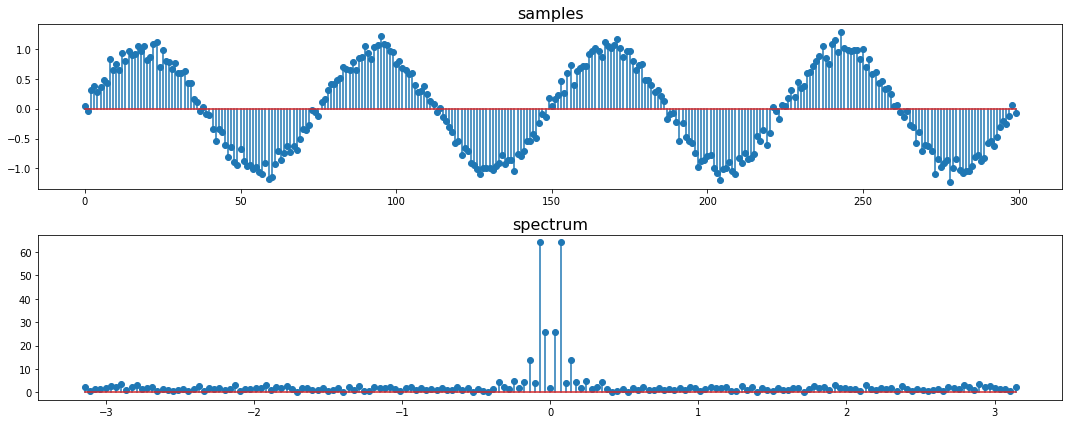

In [19]:
y = np.sin(x) + np.random.randn(N) * 0.1 
Y = fourier.dtft(y)

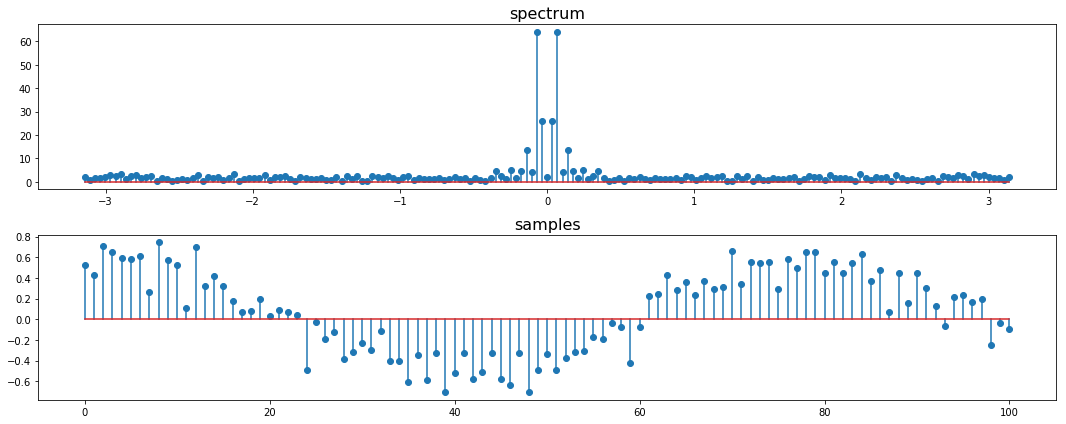

In [20]:
_ = fourier.idtft(Y, n_samples=101)

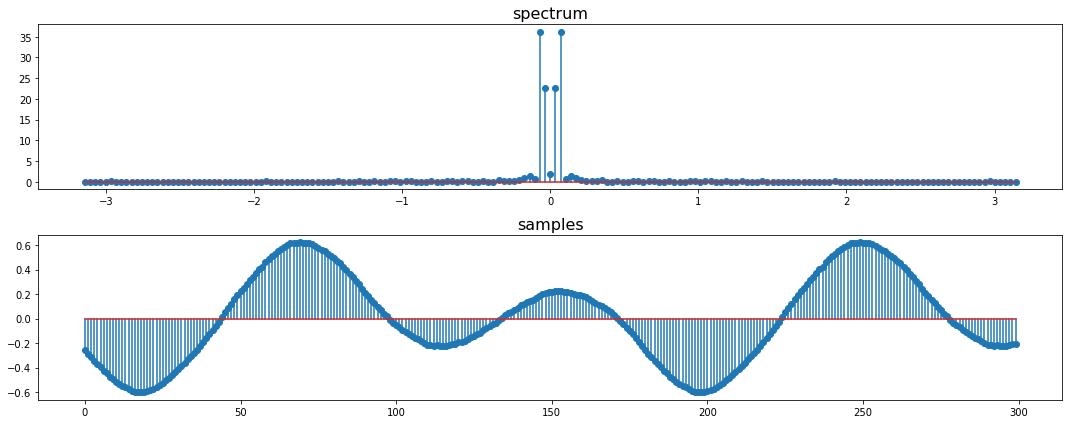

In [21]:
filtered = Y*X/np.max(abs(X))
y_new = fourier.idtft(filtered, n_samples=len(y))

In [22]:
# ch = Channel(y)
# ch.plot()

In [23]:
# ch.make_spectrum().plot()

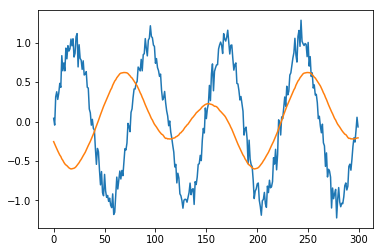

In [24]:
plt.plot(y)
plt.plot(y_new);

In [25]:
# x1 = fourier.idtft(X, n_samples = len(x))

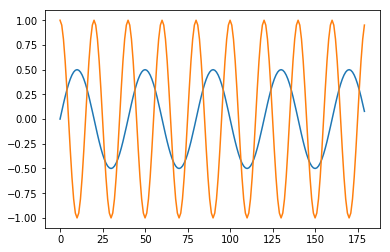

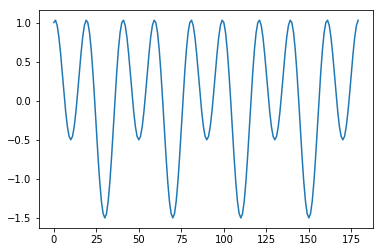

In [26]:
w0 = PI2/40
n = np.arange(N_SAMPLES)
x  = 1/2*np.sin(w0*n) 
x2 = np.cos(w0*n*2)

plt.plot(n, x);
plt.plot(n, x2);
plt.show()
plt.plot(n, x + x2);

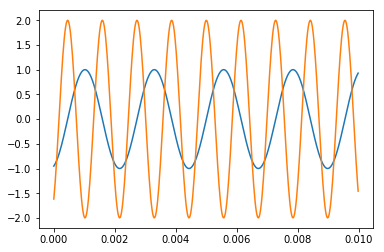

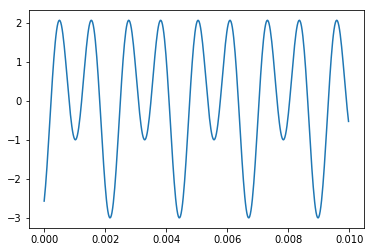

In [27]:
sample_rate = 44100
duration = 0.01
ts =  np.arange(sample_rate * duration)  / sample_rate

w0 = f = 440
theta_0 = 8*np.pi / 5 

phase = PI2*w0*ts + theta_0

# x  = 1/2*np.sin(PI2*w0*ts + theta_0) 
# x2 =     np.cos(PI2*w0*ts*2 + theta_0*2)


x  = np.sin(phase) 
x2 = np.cos(phase*2) * 2

plt.plot(ts, x);
plt.plot(ts, x2);
plt.show()
plt.plot(ts, x + x2);

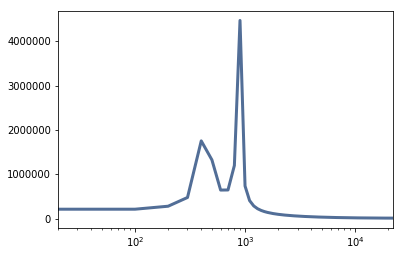

In [28]:
tb = Channel(x+x2, ts).make_spectrum()
tb.plot()
plt.xscale('log');

In [29]:
# X = fourier.dft(x+ x2)

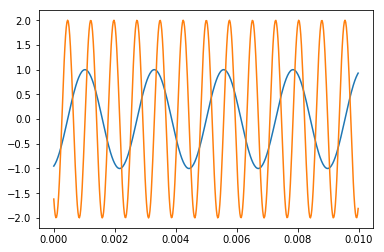

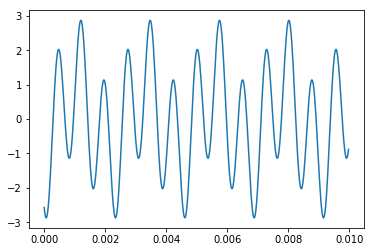

In [30]:
x3 = np.cos(phase*3) * 2

plt.plot(ts, x);
plt.plot(ts, x3);
plt.show()
plt.plot(ts, x + x3);

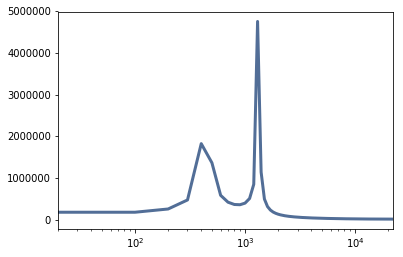

In [31]:
tb = Channel(x+x3, ts).make_spectrum()
tb.plot()
plt.xscale('log');

lamda:  0.9888888888888889


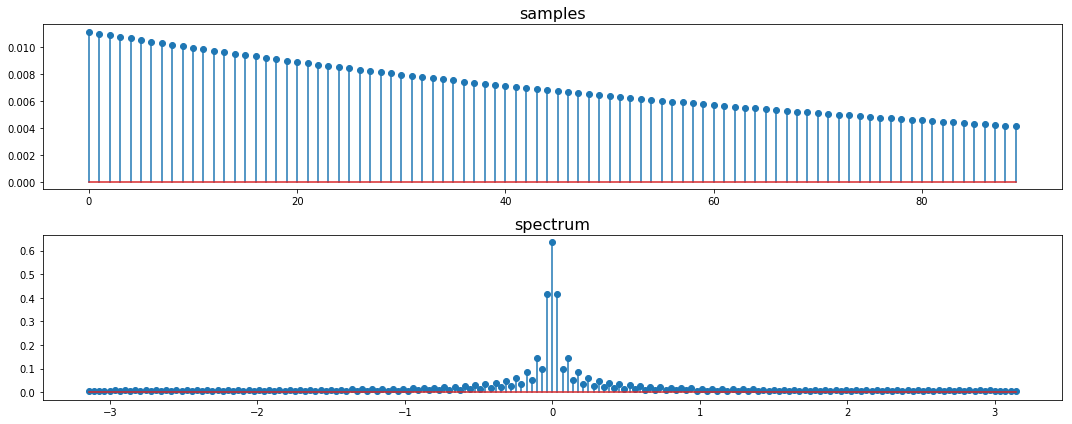

In [32]:
window_size = 90
lamda = (window_size - 1) / window_size
print('lamda: ', lamda)

h = convolver.leaky_window(window_size=window_size)
H = fourier.dtft(h);

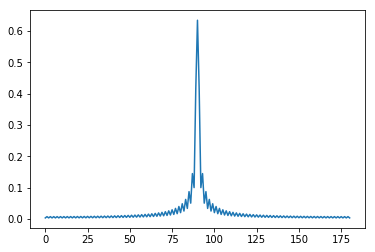

In [33]:
plt.plot(abs(H));

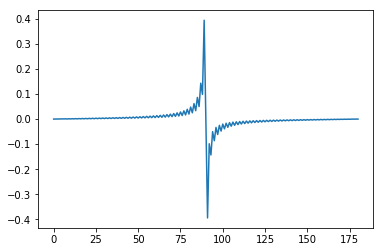

In [34]:
plt.plot(H.imag);

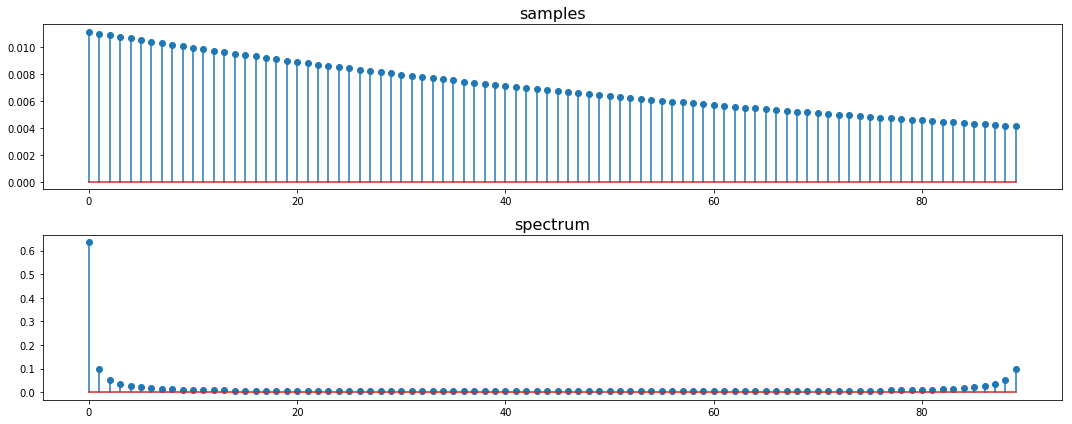

In [35]:
_ = fourier.dft(h)

In [36]:
c1 = 1+1.j
c2 = 1+1.j
c1*c2

2j

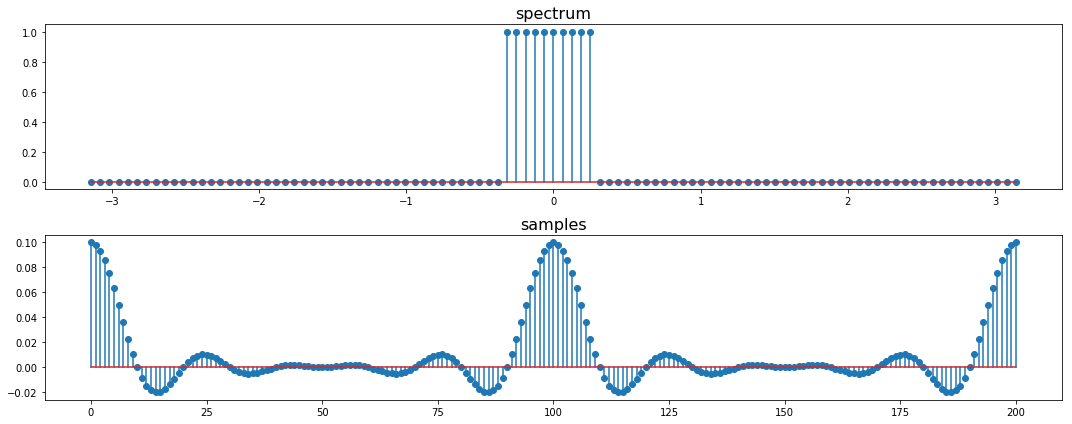

In [37]:
w = dsp.get_freq_bins(100)
H = np.zeros(w.shape)
wc = 5
H[50-wc:50+wc] = 1
h = fourier.idtft(H, n_samples=201)

In [38]:
h, H, w, wc, n = symbols('h H w wc n')
h = 1/pi2 * integrate(E**(I*w*n), (w, -wc, wc))
h = h.rewrite(sin).simplify()
h

⎧sin(n⋅wc)                            
⎪─────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎪   π⋅n                               
⎨                                     
⎪   wc                                
⎪   ──              otherwise         
⎩   π                                 

In [39]:
print(h)

Piecewise((sin(n*wc)/(pi*n), (n > -oo) & (n < oo) & Ne(n, 0)), (wc/pi, True))


/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


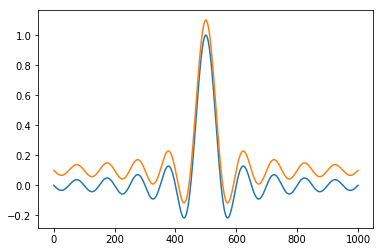

In [40]:
x = np.linspace(-10, 10, 1001)
plt.plot(np.sinc(x))
plt.plot(np.sin(np.pi * x)/(np.pi*x) + 0.1)

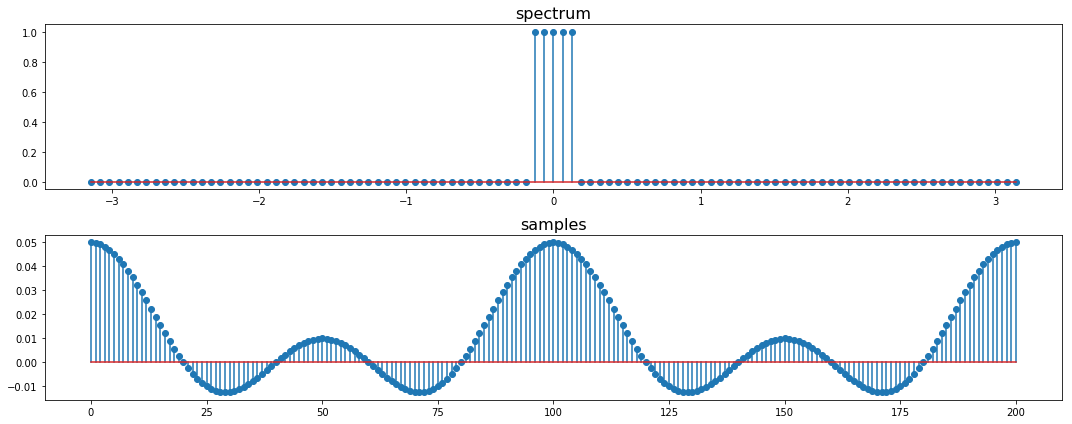

In [41]:
w = dsp.get_freq_bins(100)
wc = np.pi * 0.1
H = dsp.rect(w, wc)
h = fourier.idtft(H, n_samples=201)

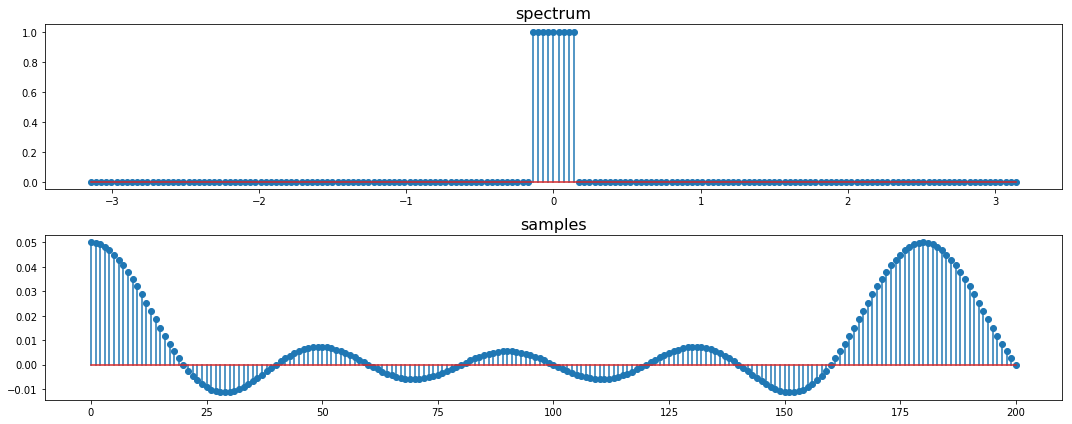

In [42]:
H = filtering.low_pass_filter_frequency_response(freq_bins = FREQ_BINS, cutoff_ratio = 0.1)
h = fourier.idtft(H, n_samples=201)

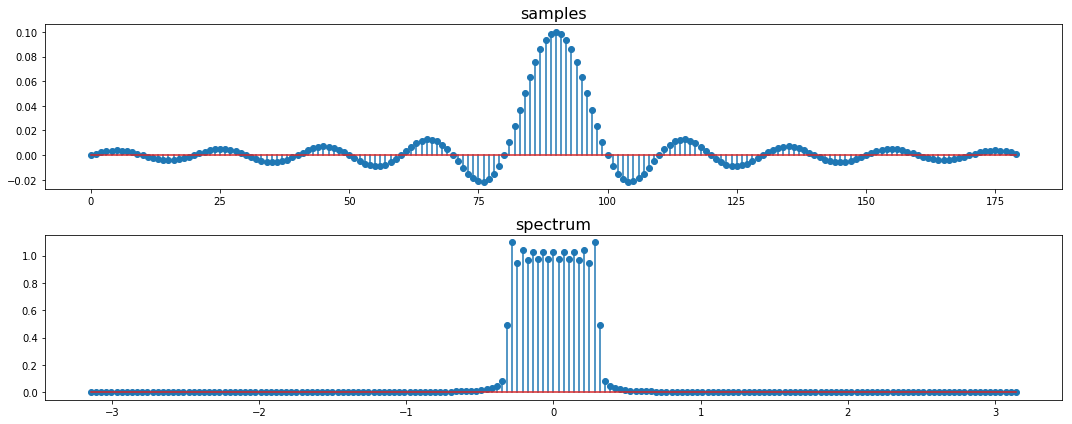

In [43]:
h = filtering.low_pass_filter_impulse_response(cutoff_ratio = 0.1, n_samples = N_SAMPLES)
H = fourier.dtft(h)

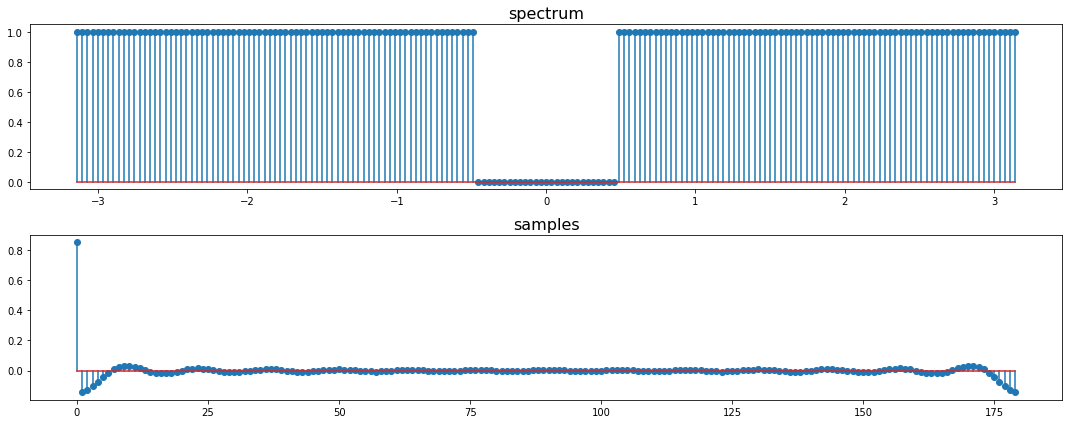

In [44]:
H = filtering.high_pass_filter_frequency_response(freq_bins = FREQ_BINS, cutoff_ratio = 0.3)
h = fourier.idtft(H, n_samples=N_SAMPLES)

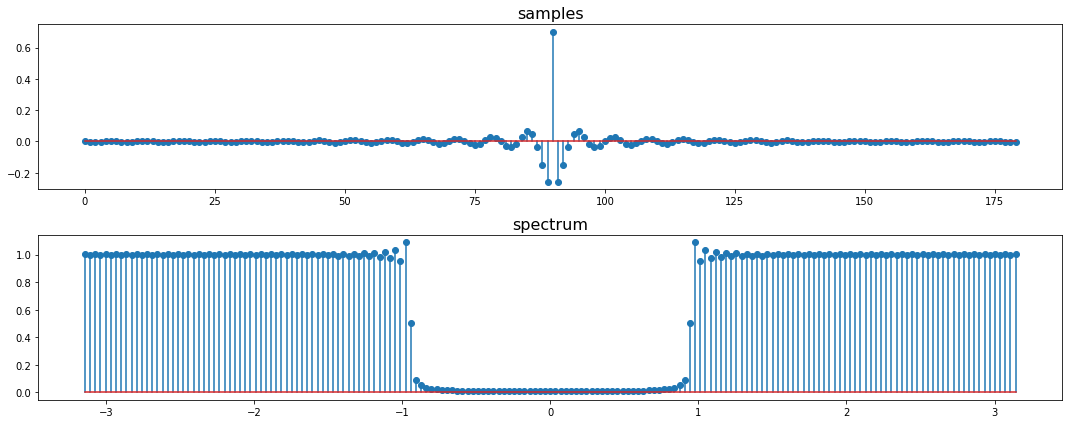

In [45]:
h = filtering.high_pass_filter_impulse_response(cutoff_ratio = 0.3, a = 0.6, n_samples = N_SAMPLES)
H = fourier.dtft(h)

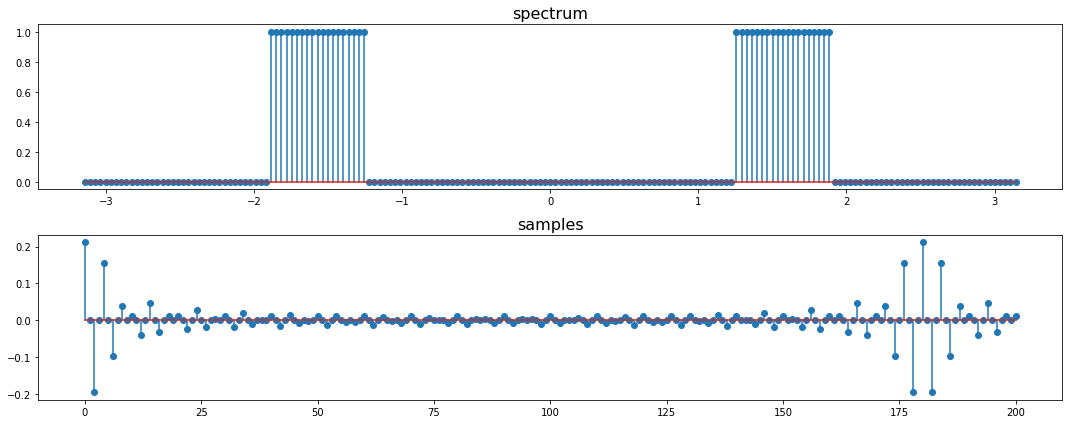

In [46]:
H = filtering.band_pass_filter_frequency_response(center = 0.5, cutoff_ratio = 0.1, freq_bins = FREQ_BINS)
h = fourier.idtft(H, n_samples=201)

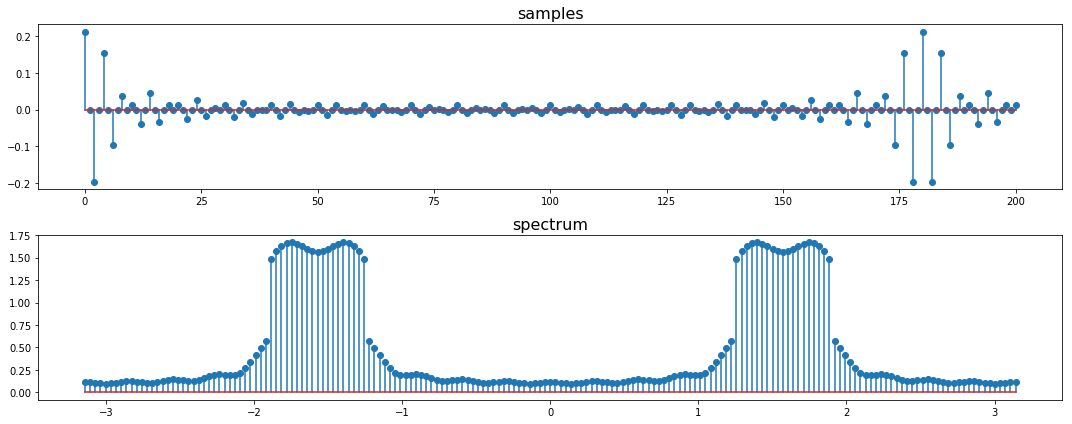

In [47]:
H = fourier.dtft(h)

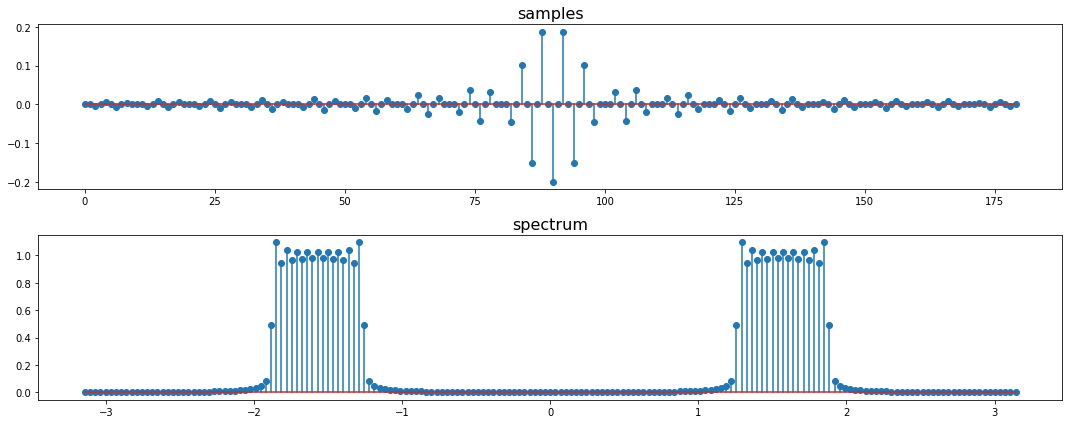

In [48]:
h = filtering.band_pass_filter_impulse_response(center = 0.5, cutoff_ratio = 0.1, n_samples = N_SAMPLES)
H = fourier.dtft(h)

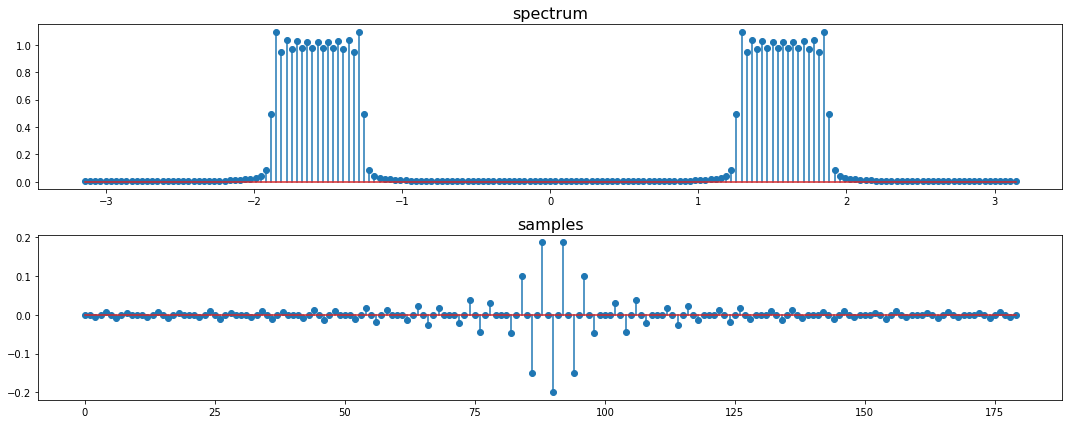

In [49]:
h = fourier.idtft(H)

### Low pass filter

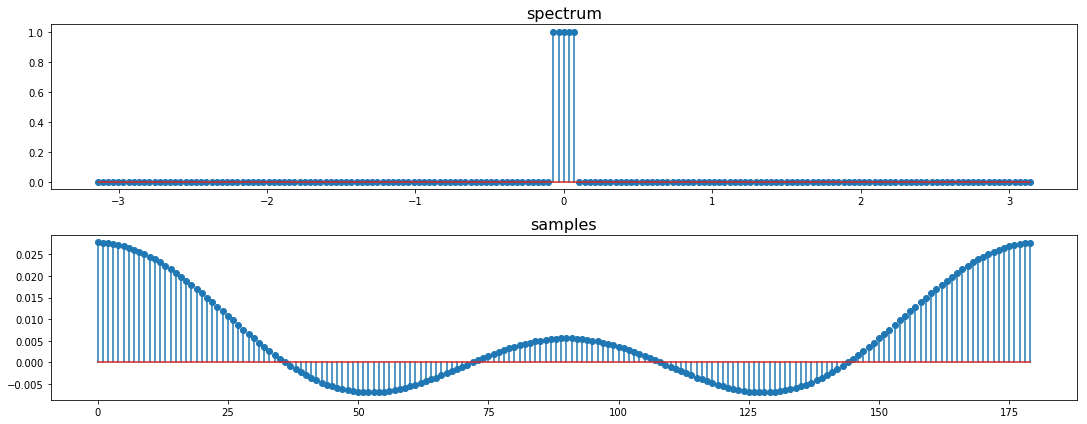

In [50]:
H = filtering.low_pass_filter_frequency_response(cutoff_ratio = 1/20)
h = fourier.idtft(H)

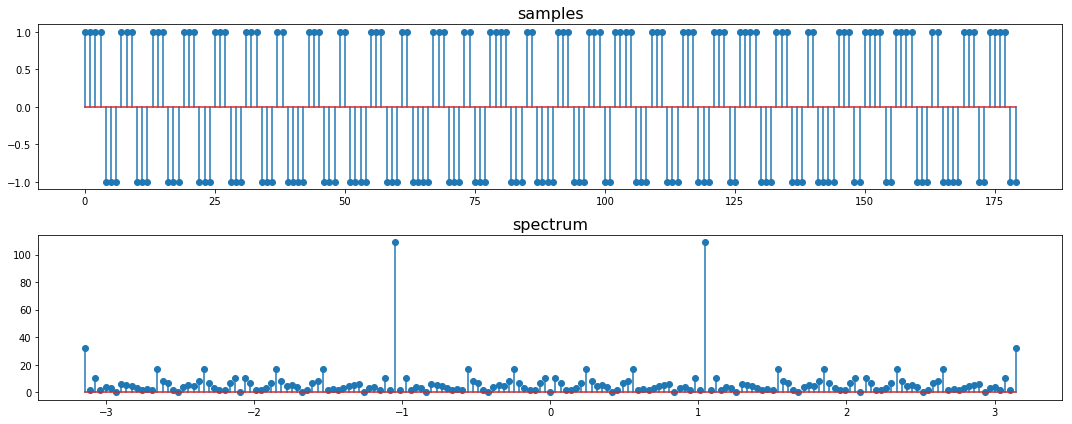

In [51]:
n = np.arange(N_SAMPLES)
x = np.sign(np.sinc(-n/3))
X = fourier.dtft(x)

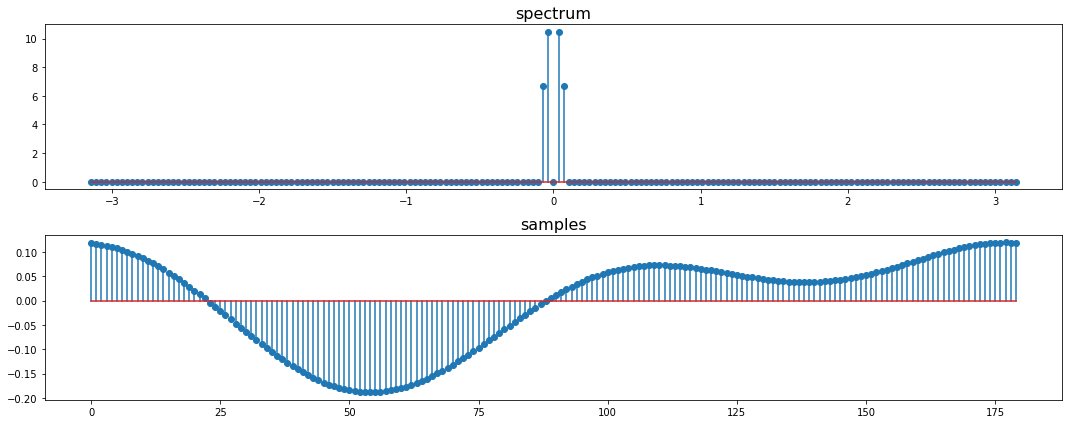

In [52]:
Y = X * H
y = fourier.idtft(Y)

### Flipper 的效用?

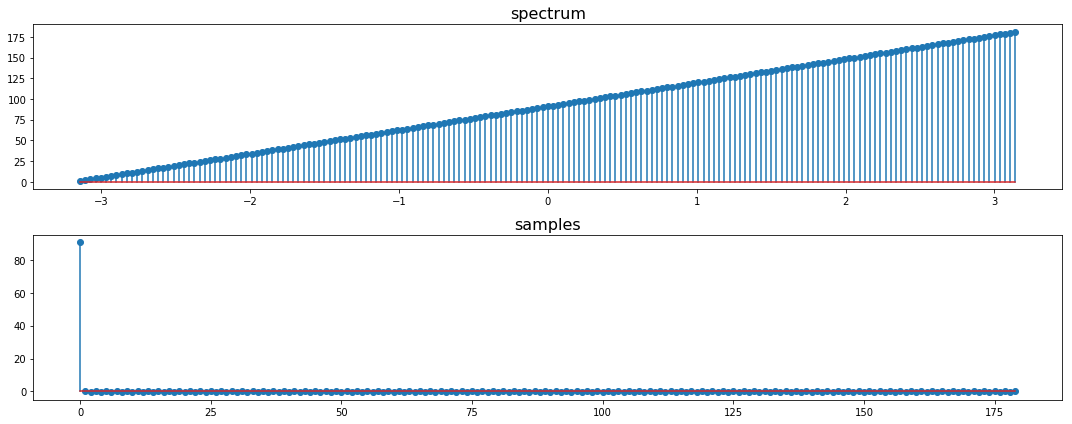

In [53]:
X = np.arange(len(H)) + 1
# X = np.ones_like(H)
x = fourier.idtft(X)

In [54]:
# H = filtering.low_pass_filter_frequency_response(cutoff_ratio = 1/2)
# # h = fourier.idtft(H)

# X = X * H
# x = fourier.idtft(X)

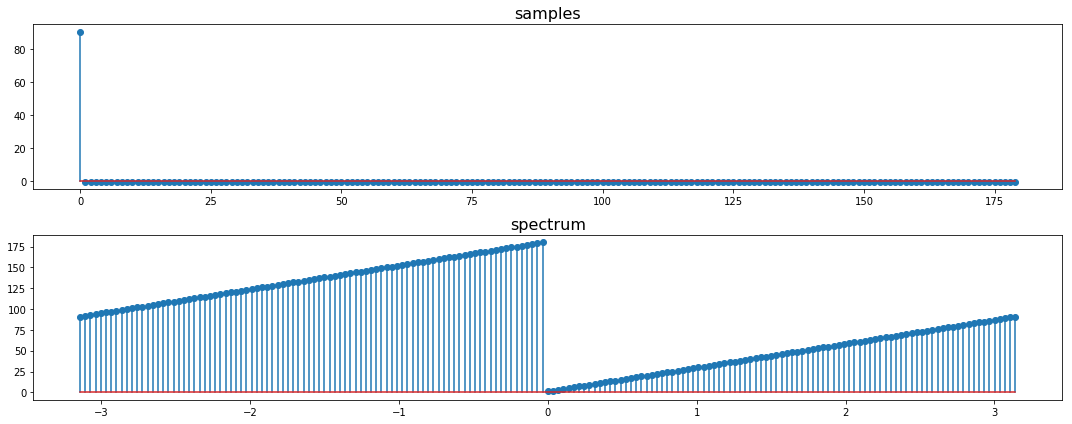

In [55]:
n = np.arange(len(x))
flipper = (-1)**n
# Flipper = fourier.dtft(flipper)

x1 = x * flipper
X1 = fourier.dtft(x1)

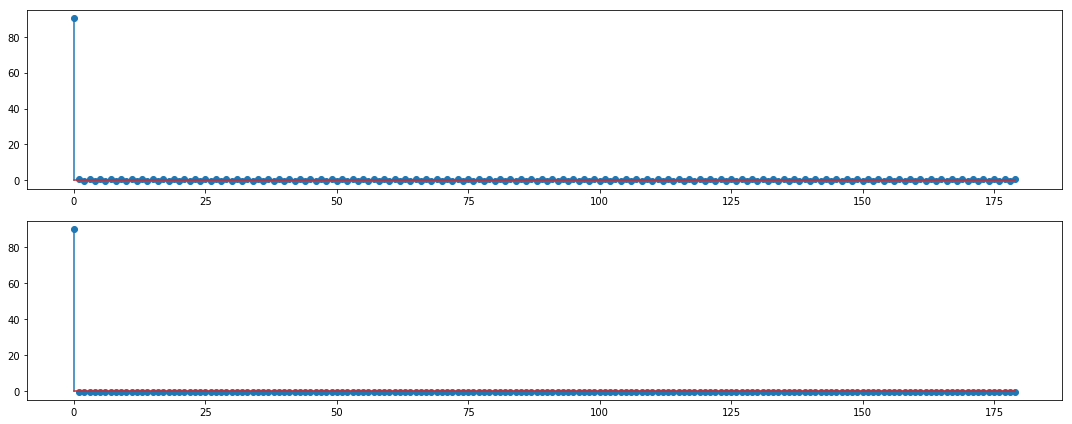

In [56]:
dsp.plot_comparison((x, x1))

# What is a Hanning window?

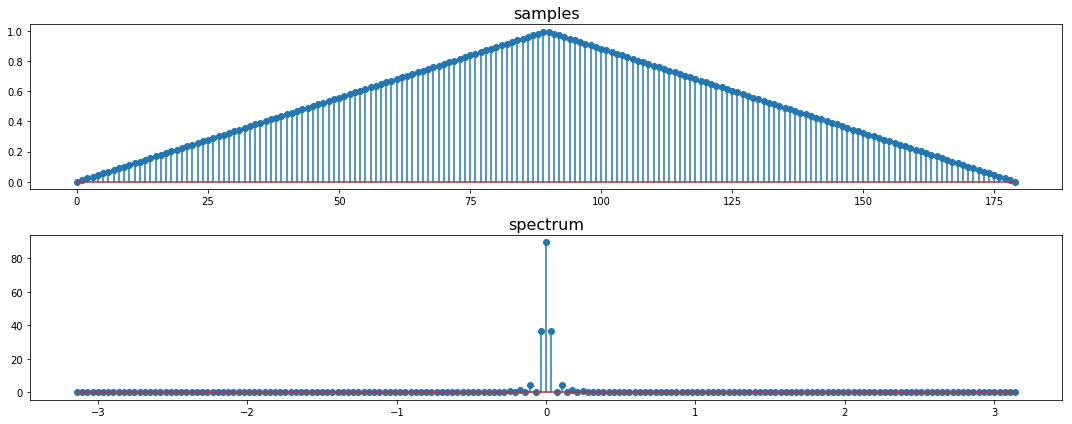

In [57]:
_ = fourier.dtft(np.bartlett(N_SAMPLES))

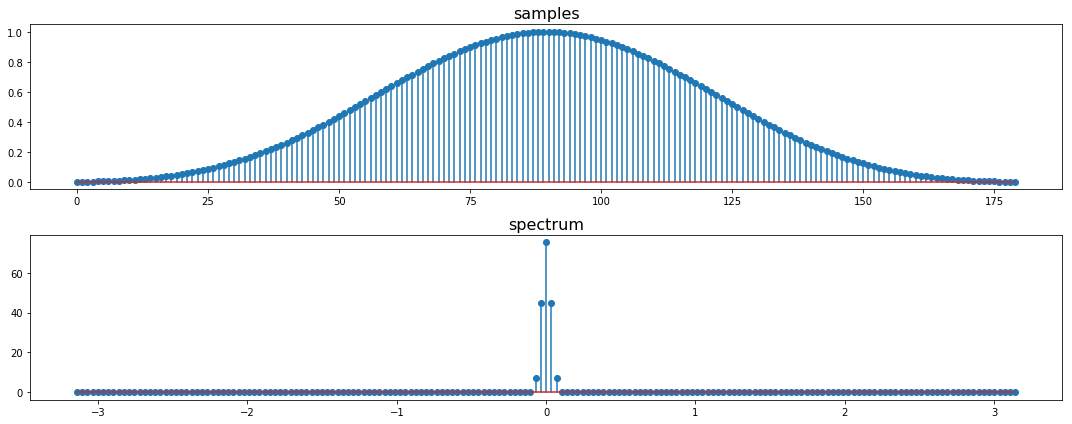

In [58]:
_ = fourier.dtft(np.blackman(N_SAMPLES))

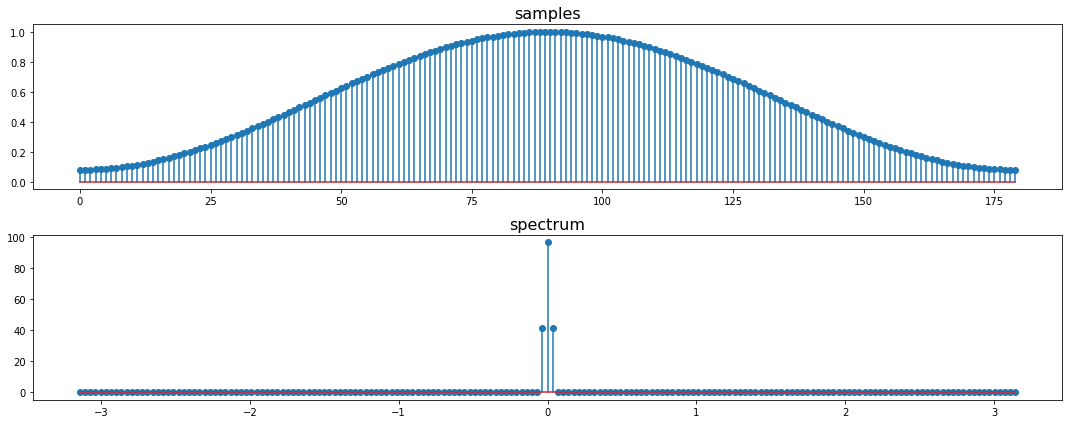

In [59]:
_ = fourier.dtft(np.hamming(N_SAMPLES))

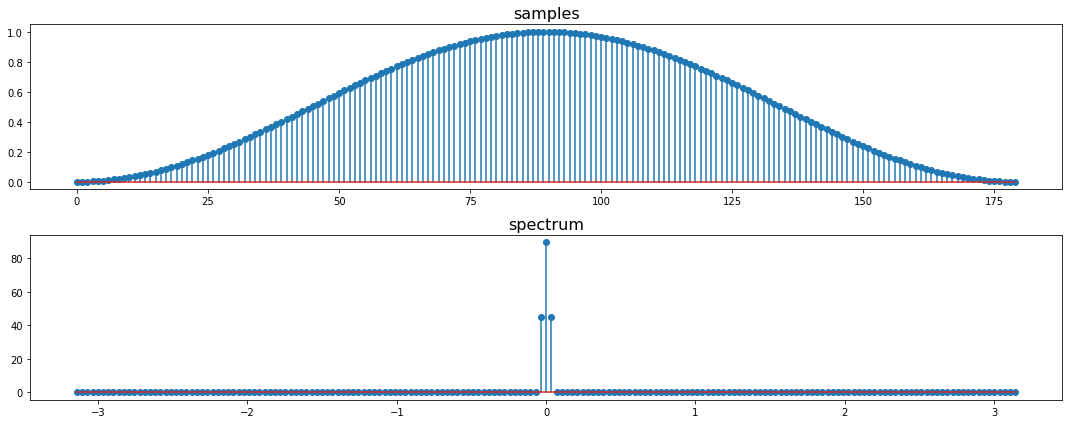

In [60]:
_ = fourier.dtft(np.hanning(N_SAMPLES))

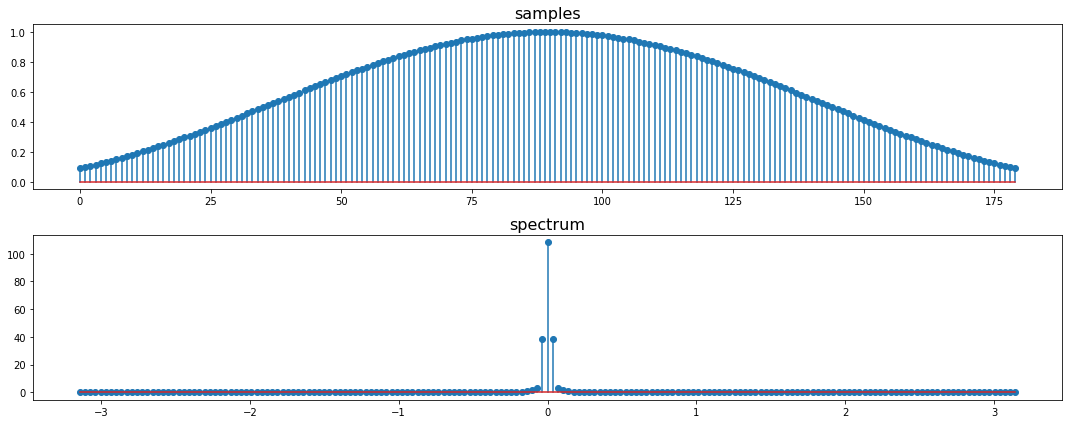

In [61]:
_ = fourier.dtft(np.kaiser(N_SAMPLES, 4))